Valeur moyenne de nos prix : 206855.81690891474
    Actual  Predicted
0  0.47700   0.516596
1  0.45800   1.555282
2  5.00001   3.639638
3  2.18600   2.490630
4  2.78000   2.581783
5  1.58700   1.677584
6  1.98200   2.626898
7  1.57500   1.728762
8  3.40000   2.319093
9  4.46600   4.720254
Root Mean Squared Error: 59510.583935811956
Mean Absolute Error: 39728.293030414396


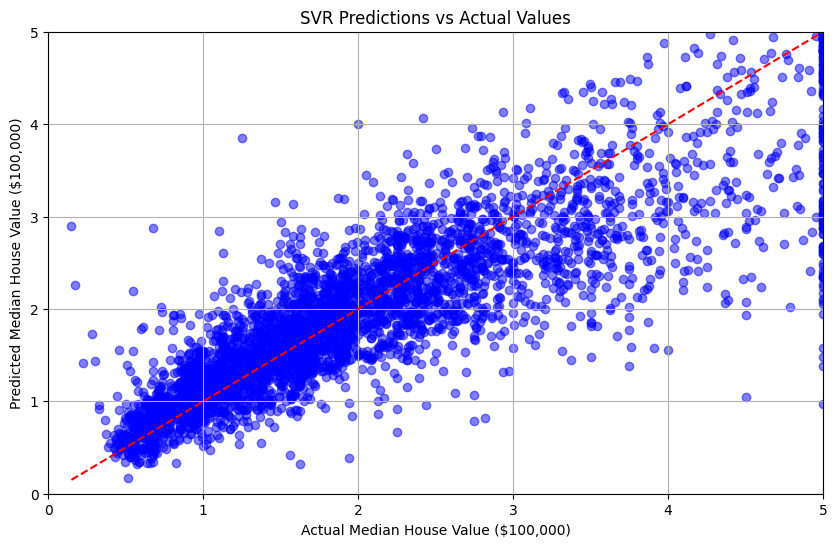

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_regression
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error,root_mean_squared_error, r2_score, mean_absolute_error


# collect the data
data = fetch_california_housing()
#print(data.DESCR)
#print(data.keys())

# get the features and target variable
X = data.data
y = data.target
feature_names = data.feature_names

# print(f'Feature names: {feature_names}')
print(f"Valeur moyenne de nos prix : {np.mean(y)*100000}")  # Mean house value in $100,000

# visualize the data
# plt.figure(figsize=(10, 6))
# plt.scatter(X[:, 0], y, color='blue', alpha=0.5)
# plt.title('California Housing Data')
# plt.xlabel('Feature: ' + feature_names[0])
# plt.ylabel('Target: Median House Value')
# plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the features
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

# Create a SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# Predict using the SVR model
y_pred_scaled = svr.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()


# dataframe to compare predictions and actual values
df = pd.DataFrame({'Actual': y_test,
                   #'Predicted_transformed': y_pred_scaled,
                   'Predicted': y_pred
})

print(df.head(10))


#print(pd.DataFrame(X_test, columns=feature_names).head(10))

#print(pd.DataFrame(scaler_x.inverse_transform(X_test), columns=feature_names).head(10))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
#print(f'Mean Squared Error: {mse}')
rmse = root_mean_squared_error(y_test, y_pred)*100000  # Convert RMSE to $100,000 scale
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(y_test, y_pred)*100000  # Convert MAE to $100,000 scale
print(f'Mean Absolute Error: {mae}')
# r2 = r2_score(y_test, y_pred)
# print(f'R^2 Score: {r2}')

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Diagonal line
plt.title('SVR Predictions vs Actual Values')
plt.xlabel('Actual Median House Value ($100,000)')
plt.ylabel('Predicted Median House Value ($100,000)')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.grid()
plt.show()